In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# World Happiness Report

## Variáveis
- GDP - Gross Domestic Product (o valor de todos os bens e servicos um pais
produz no ano)  
**The extent to which GDP contributes to the calculation of the Happiness Score.**
- Social Support - Sim ou não (Pergunta: Se estivesse em problemas, você tem
amigos ou família nos quais você pode contar) e fazem uma média
- Health Expectancy - Calculado pela WHO (pesquisar)
- Freedom to make choices - Sim ou Não
- Generosity - Sim ou Não (Pergunta: Você doou dinheiro no ultimo ano
- Corrupção - Sim ou Não - Duas perguntas (Tem corrupção no governo. Tem
corrupção nas empresas)
- Score - Somatória das variáveis

## Objetivos

- Fazer uma análise exploratória de dados através dos anos 2015 até 2019.
- Para responder as perguntas:
    - Quais foram as alterações ano a ano no ranking dos primeiros 10 países.
    - Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a
    ano.(Sem contar o score ou ranking)
    - Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GPD.
    - Qual foi o país que mais subiu no ranking no período inteiro analisado.
    - Teve países que saíram ou entraram do index.
    - Quais foram os 3 países que mais tiveram mudança na expectativa de vida, positiva e negativa.
    - 2 questões extras que vocês acham interessante analisar

In [65]:
dfs = {
    "2015": pd.read_csv("dados/2015.csv", index_col="Country", usecols=["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]),
    "2016": pd.read_csv("dados/2016.csv", index_col="Country", usecols=["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]),
    "2017": pd.read_csv("dados/2017.csv", index_col="Country", usecols=["Country", "Happiness.Rank", "Happiness.Score", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption."]),
    "2018": pd.read_csv("dados/2018.csv", index_col="Country or region", usecols=["Country or region","Overall rank","Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]),
    "2019": pd.read_csv("dados/2019.csv", index_col="Country or region", usecols=["Country or region","Overall rank", 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Generosity'])
}

In [66]:
renames = {
    'Northern Cyprus': 'North Cyprus',
    'Hong Kong': 'Hong Kong S.A.R., China',
    'Somaliland region': 'Somaliland Region',
    'Taiwan': 'Taiwan Province of China',
    'Trinidad and Tobago': 'Trinidad & Tobago',
    'North Macedonia': 'Macedonia',
}
for year in range(2015, 2020):
    dfs[str(year)] = dfs[str(year)].rename(index=renames)

In [67]:
# Renaming Columns
dfs["2015"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2016"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2017"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2018"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']
dfs["2019"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

- 2 questões extras que vocês acham interessante analisar

<AxesSubplot:>

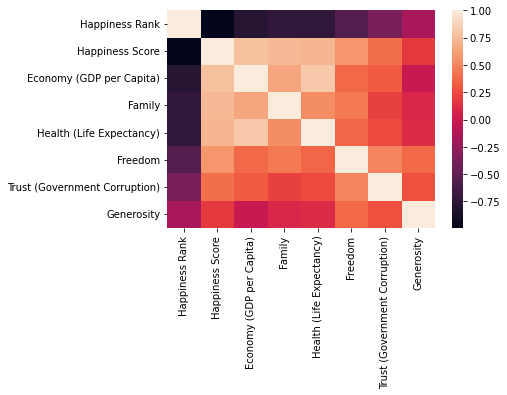

In [68]:
import seaborn as sns
corr = dfs["2015"].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [69]:
import geopandas
import matplotlib.pyplot as plt

In [70]:
# Carregar a GeoSeries 'naturalearth_lowres' do Geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world.name!="Antarctica"]

In [71]:
# Montar o dataframe 'df_ranks', que informa a posição de cada país no ranking ao longo de todo o período
# Carregar cada coluna "Happiness Rank" de todos os anos, concatenar e guardar o resultado em df_ranks
all_country_rank = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks = pd.concat(all_country_rank, axis=1).reset_index()
df_ranks.columns = ["name", "2015", "2016", "2017", "2018", "2019"]
# df_ranks

In [72]:
# Verificar a consistência na nomenclatura dos países:
# - Comparar a coluna 'name' da GeoSeries 'world' com a coluna 'names' do df 'df_ranks'
# Tratar nomenclaturas divergentes:
# - Após verificação, os valores divergentes constatados por meio de um dicionário 'ren_world' e
# da aplicação do método .replace() em df_ranks, para que prevaleça a nomenclatura constante do
# da GeoSeries 'world'.


# testes de nomenclatura
# merge_names = world.merge(df_ranks, how='right')
# merge_names.name[merge_names.isna().any(axis=1)]
# merge_names = world.merge(df_ranks, how='outer')
# merge_names.name[merge_names.isna().any(axis=1)]


ren_world = {"Bosnia and Herzegovina": "Bosnia and Herz.",
            "Central African Republic": "Central African Rep.",
            "Congo (Brazzaville)": "Congo",
            "Congo (Kinshasa)": "Dem. Rep. Congo",
            "Czech Republic": "Czechia",
            "Dominican Republic": "Dominican Rep.",
            "Macedonia": "North Macedonia",
            "Palestinian Territories": "Palestine",
            "Somaliland Region": "Somaliland",
            "South Sudan": "S. Sudan",
            "Taiwan Province of China": "Taiwan",
            "Trinidad & Tobago": "Trinidad and Tobago",
            "United States": "United States of America"}

df_ranks = df_ranks.replace({"name": ren_world})

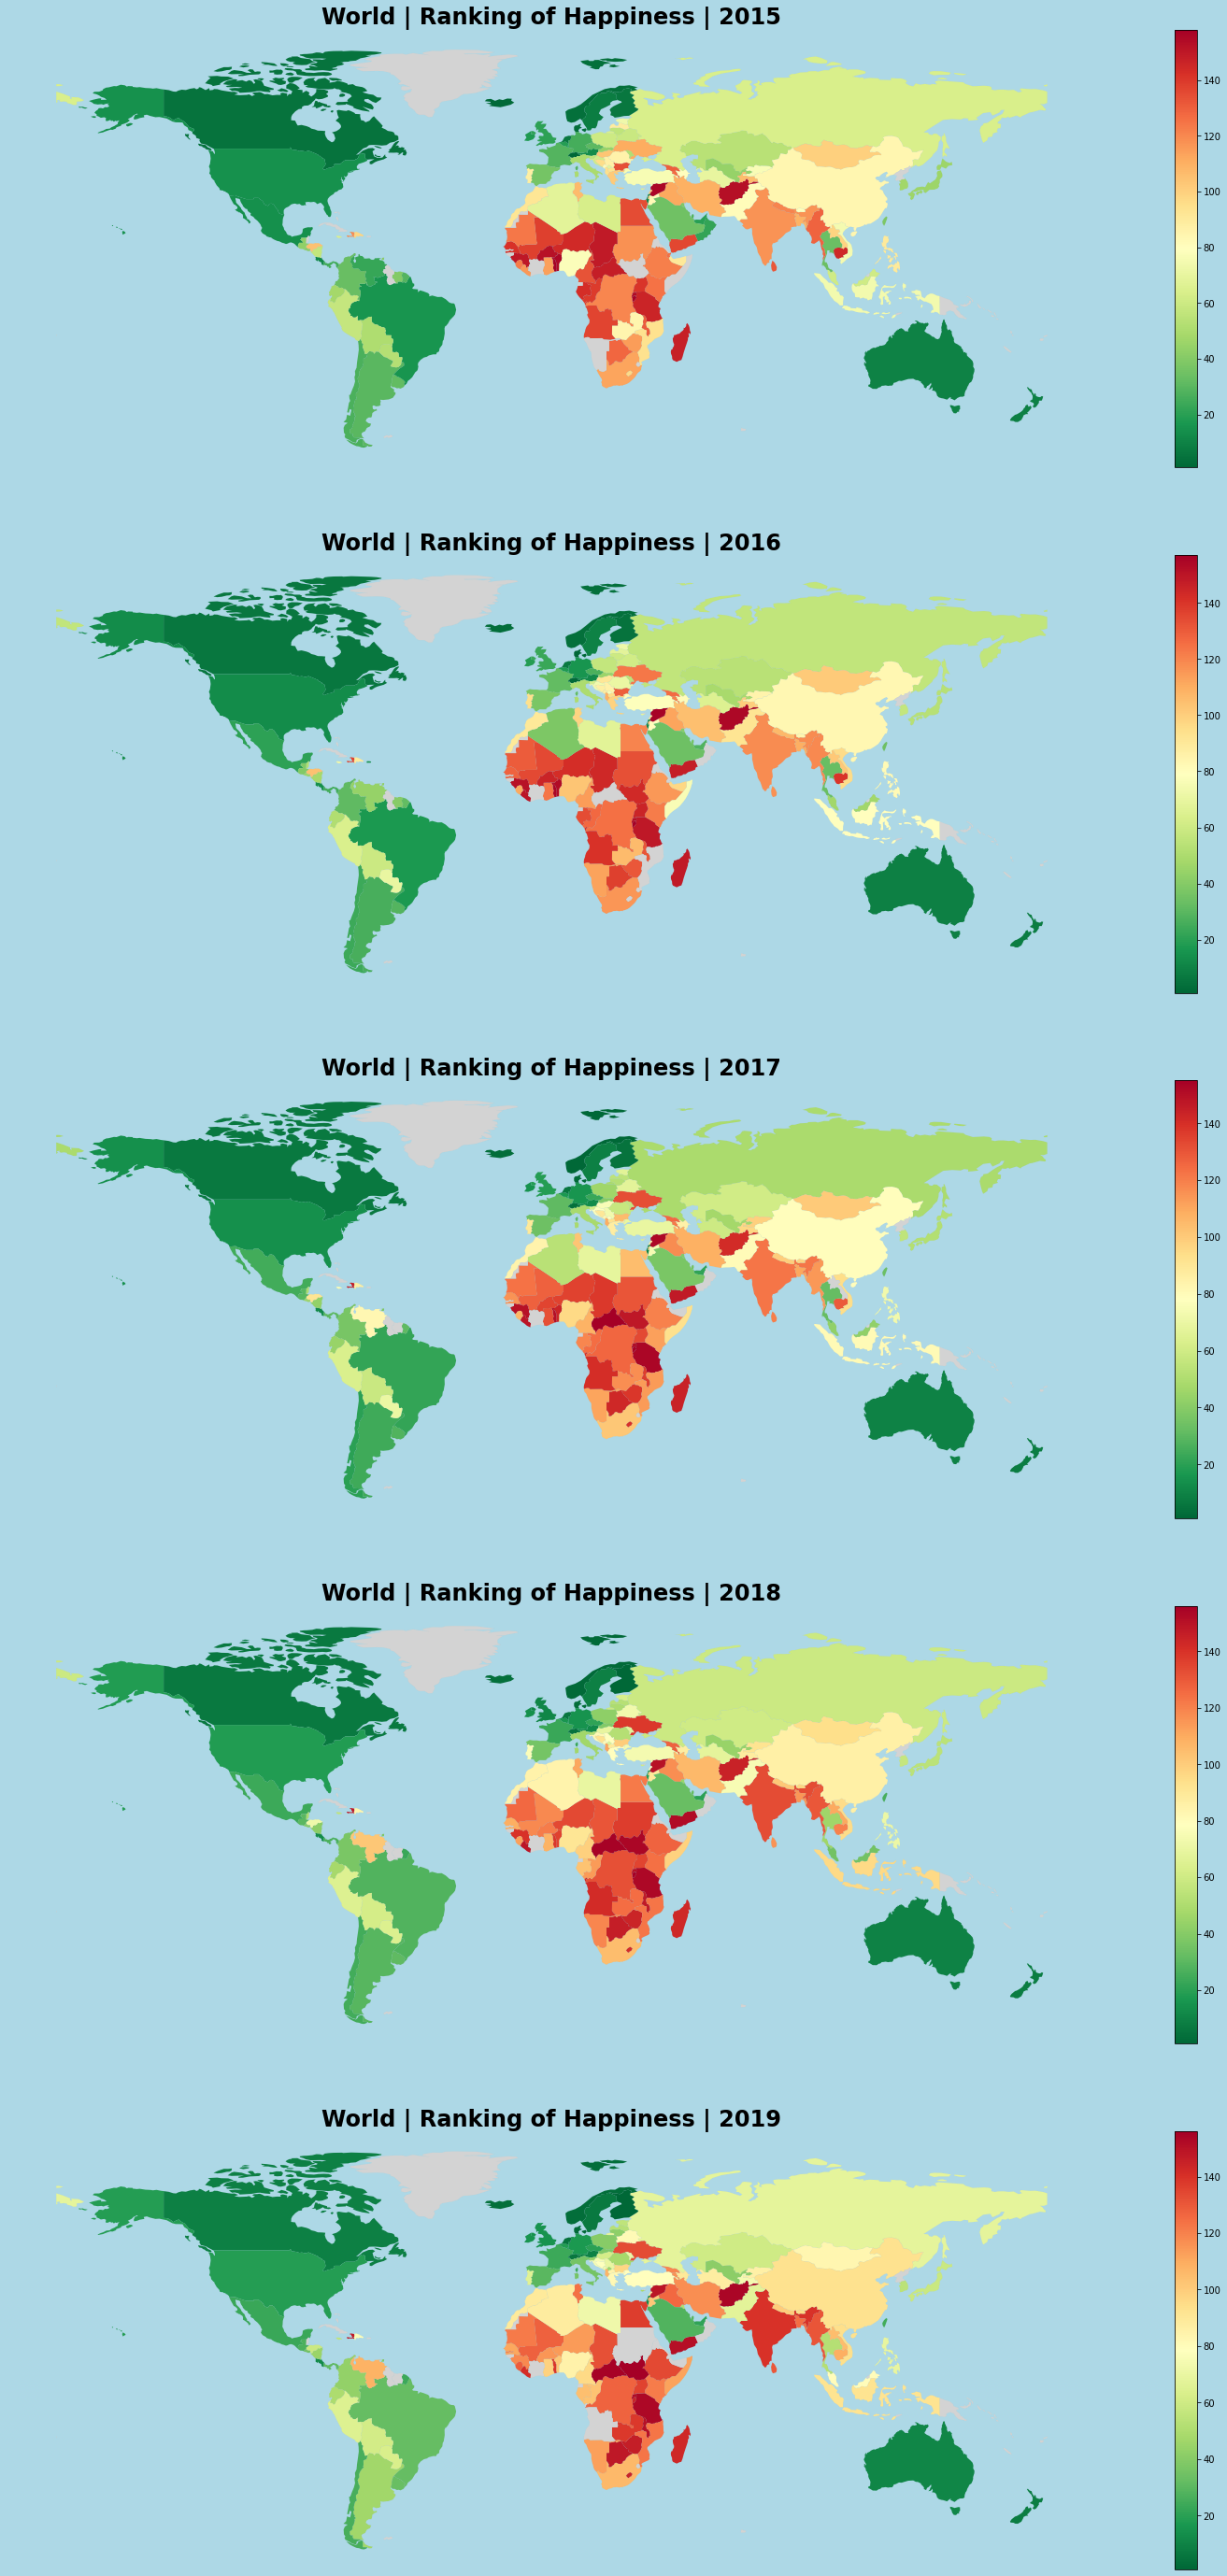

In [73]:
# Plotar os mapas com o ranking da felicidade com a abrangência Mundo:
# Fazer merge dos dfs 'world' e 'df_ranks'
# Iterar para cada ano de 2015 a 2019 a plotagem do mapa na respectiva coluna 'year'

world_rank = world.merge(df_ranks, how='left')
fig, axes = plt.subplots(5, figsize=(30,50), facecolor='lightblue')

i=0
for year in range(2015,2020):
    ax = axes[i]
    ax.title.set_text(f"World | Ranking of Happiness | {year}")
    ax.title.set_fontsize(24)
    ax.title.set_weight('bold')
    ax.axis("off")

    world_rank.plot(column=str(year),
        ax=ax,
        legend='reverse',
        cmap='RdYlGn_r',
        facecolor='lightblue',
        edgecolors='grey',
        linewidth = 0.01,
        missing_kwds={'color': 'lightgrey'})
    i = i+1
# plt.savefig(f'World.png', dpi=300, format='png')

In [74]:
# Fazer os recortes territoriais: Europa e América do Sul
# Para efeitos de melhor enquadramento dos mapas, foi necessário fazer os tratamentos:
# - Rússia foi excluída de Europa
# - os países França e Noruega tiveram suas geometrias adaptadas (alguns polígonos excliuídos dos respectivos
# conjuntos multipolygon)
# Fazer merge dos dfs 'europe' e 'df_ranks'
# Fazer merge dos dfs 'samerica' e 'df_ranks'

europe = world[(world.continent=="Europe") & (world.name!="Russia")]
europe_rank = europe.merge(df_ranks, how='left')

france = europe_rank[europe_rank.name == 'France']
slice_france = france.geometry.iloc[0][1:2]
europe_rank.loc[europe_rank.name == 'France', 'geometry'] = slice_france

norway = europe_rank[europe_rank.name == 'Norway']
slice_norway = norway.geometry.iloc[0][1:2]
europe_rank.loc[europe_rank.name == 'Norway', 'geometry'] = slice_norway

samerica = world[(world.continent=='South America')|(world.name=='France')]
samerica_rank = samerica.merge(df_ranks, how='left')

france = world[world.name == 'France']
france = samerica_rank[samerica_rank.name == 'France']
guiana_f = france.geometry.iloc[0][0]
samerica_rank.loc[samerica_rank.name == 'France', 'geometry'] = guiana_f

samerica_rank.loc[samerica_rank.name == 'France', 'name'] = "French Guiana"
french_guiana = {'pop_est': np.nan,
                'continent': 'South America',
                'iso_a3': None,
                'gdp_md_est': np.nan,
                '2015': np.nan,
                '2016': np.nan,
                '2017': np.nan,
                '2018': np.nan,
                '2019': np.nan}

for k, v in french_guiana.items():
    samerica_rank.loc[samerica_rank.name == 'French Guiana', k] = v

C:\Users\minoru\AppData\Local\Temp\ipykernel_13724\1154675188.py:11: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  slice_france = france.geometry.iloc[0][1:2]
C:\Users\minoru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3199: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  return asarray(a).ndim
C:\Users\minoru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3199: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Sha

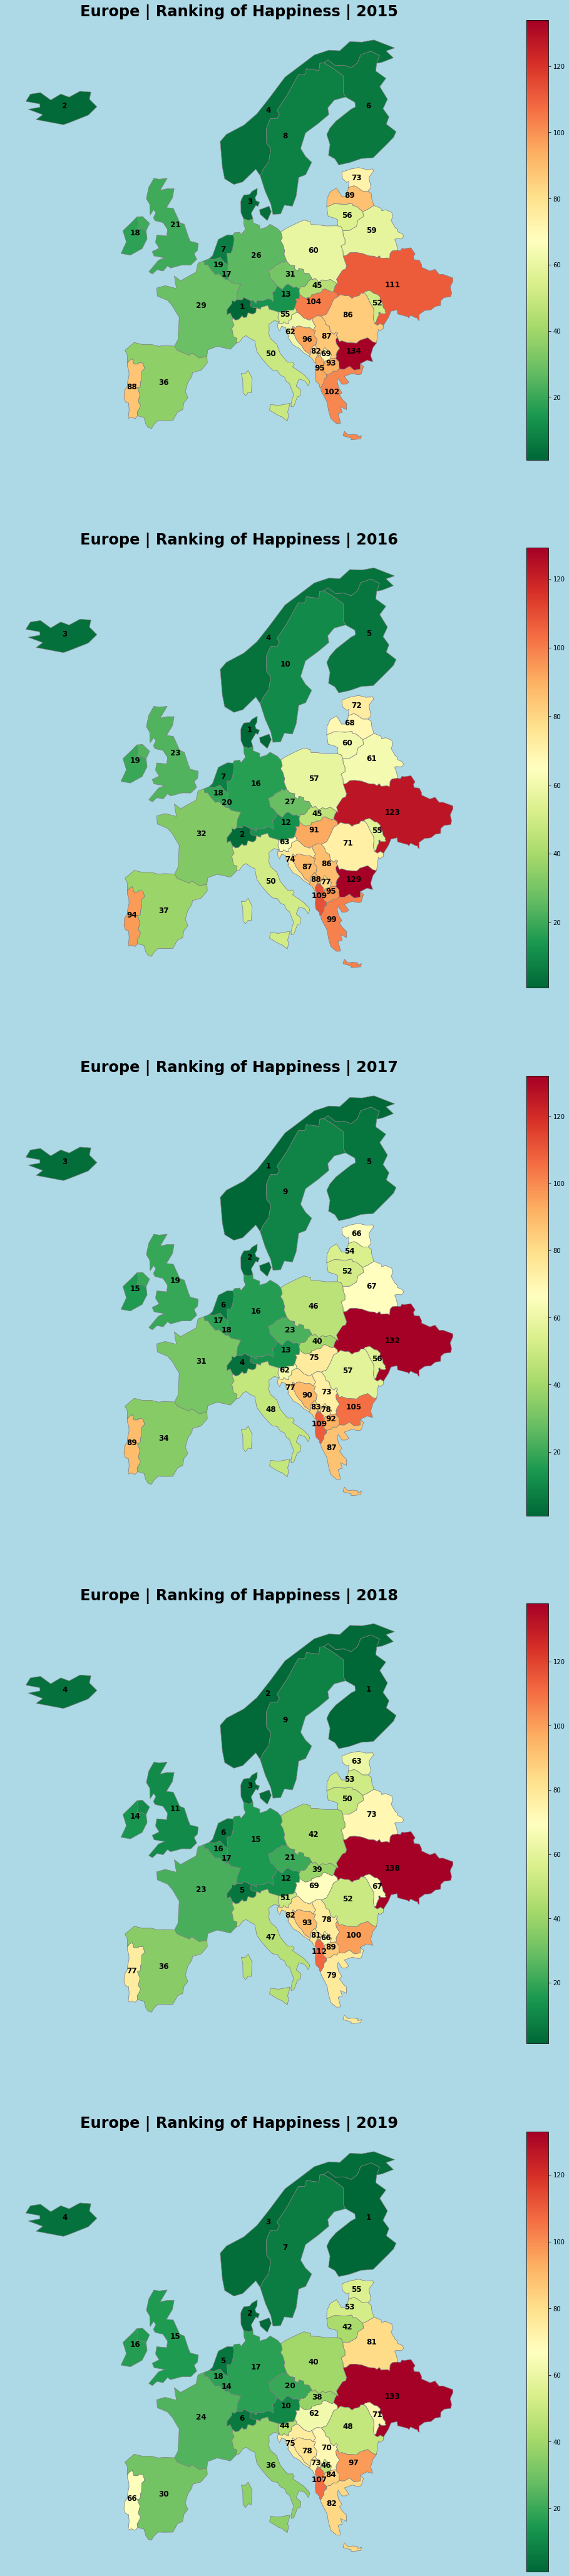

In [75]:
# Plotar os mapas com o ranking da felicidade com a abrangência Europa:
# Criar a coluna 'coords' para armazenar as coordenadas dos centróides de cada país, que serão
# utilizadas para localizar as labels
# Iterar para cada ano de 2015 a 2019 a plotagem do mapa na respectiva coluna 'year'

europe_rank['coords'] = europe_rank['geometry'].apply(lambda x: x.representative_point().coords[:])
europe_rank['coords'] = [coords[0] for coords in europe_rank['coords']]

fig, axes = plt.subplots(5, figsize=(30,75), facecolor='lightblue')

i=0
for year in range(2015,2020):
     ax = axes[i]
     ax.title.set_text(f"Europe | Ranking of Happiness | {year}")
     ax.title.set_fontsize(24)
     ax.title.set_weight('bold')
     ax.axis("off")

     europe_rank.plot(column=str(year),
          ax=ax,
          legend=True,
          label=True,
          cmap='RdYlGn_r',
          facecolor='lightblue',
          edgecolors='grey',
          linewidth = 0.75,
          missing_kwds={'color': 'lightgrey'})
     for idx, row in europe_rank.iterrows():
          ax.annotate(int(row[str(year)]), xy=row['coords'], horizontalalignment='center', color='black', weight='semibold', fontsize='12')
          # print(row['2015'],': ',row['name'])
     i+=1

# plt.savefig(f'Europe.png', dpi=300, format='png')

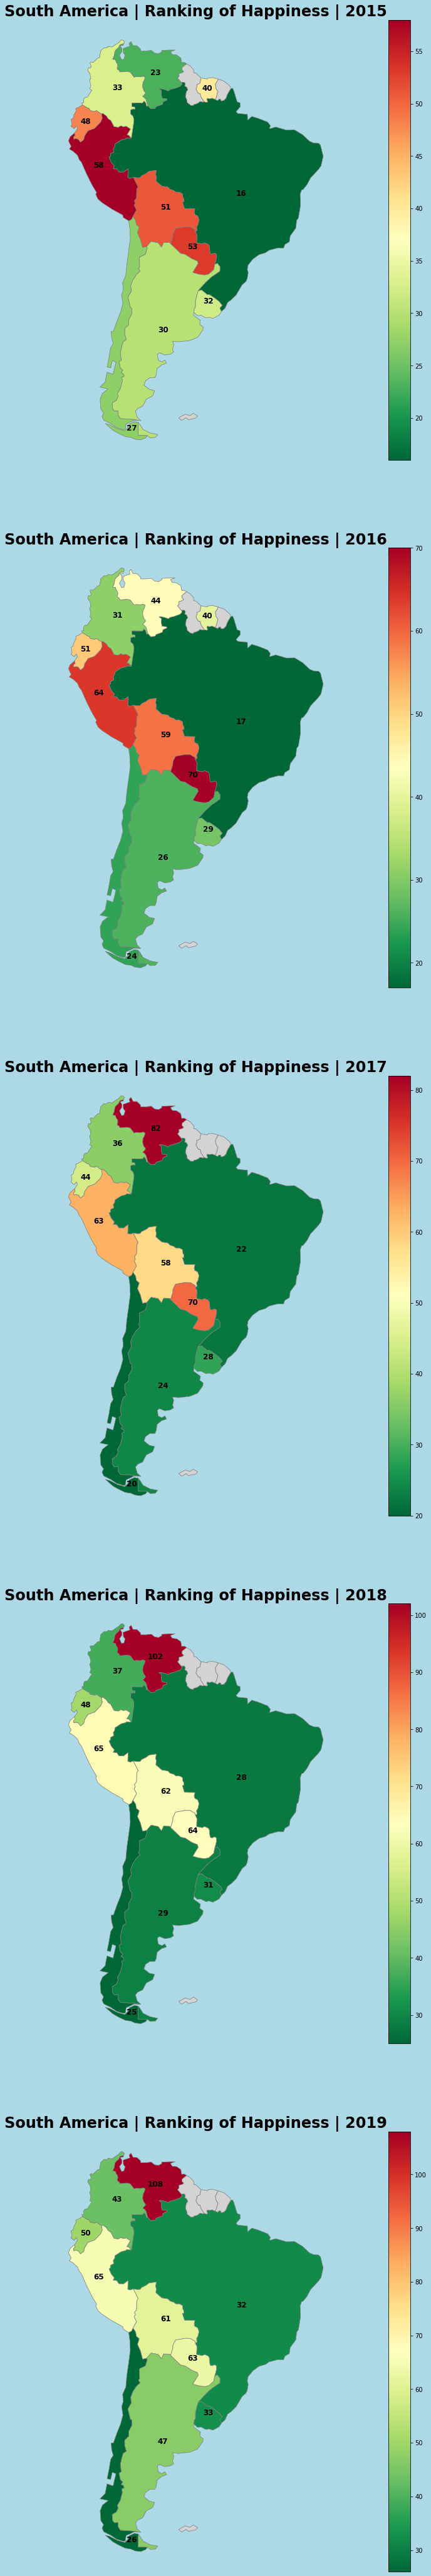

In [76]:
# Plotar os mapas com o ranking da felicidade com a abrangência South América:
# Criar a coluna 'coords' para armazenar as coordenadas dos centróides de cada país, que serão
# utilizadas para localizar as labels
# Iterar para cada ano de 2015 a 2019 a plotagem do mapa na respectiva coluna 'year'

samerica_rank['coords'] = samerica_rank['geometry'].apply(lambda x: x.representative_point().coords[:])
samerica_rank['coords'] = [coords[0] for coords in samerica_rank['coords']]

fig, axes = plt.subplots(5, figsize=(30,75), facecolor='lightblue')

i=0
for year in range(2015,2020):
     ax = axes[i]
     ax.title.set_text(f"South America | Ranking of Happiness | {year}")
     ax.title.set_fontsize(24)
     ax.title.set_weight('bold')
     ax.axis("off")

     samerica_rank.plot(column=str(year),
          ax=ax,
          legend=True,
          label=True,
          cmap='RdYlGn_r',
          facecolor='lightblue',
          edgecolors='grey',
          linewidth = 0.75,
          missing_kwds={'color': 'lightgrey'})
     for idx, row in samerica_rank.iterrows():
          ax.annotate(int(row[str(year)]) if row[str(year)]>0 else '', xy=row['coords'], horizontalalignment='center', color='black', weight='semibold', fontsize='12')
     i+=1
# plt.savefig(f'SAmerica.png', dpi=300, format='png')


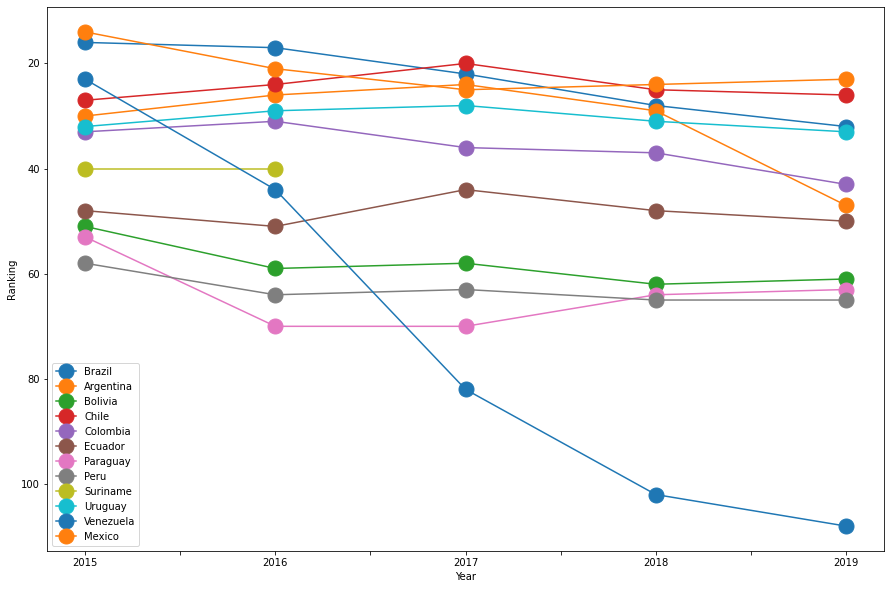

In [77]:
ranks = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks_tl = pd.concat(ranks, axis=1)
df_ranks_tl.columns = ["2015", "2016", "2017", "2018", "2019"]                                                                                      # Mexico :D \/
df_plot = df_ranks_tl.loc[["Brazil", "Argentina", "Bolivia", "Chile", "Colombia", "Ecuador", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela", "Mexico"], :]
df_plot.T.plot(kind="line", figsize=(15, 10), ylabel="Ranking", xlabel="Year", marker="o", ms=15).invert_yaxis()